### New giotto-time features: generalized detrending and sorted density

*Created by:* Helena Peic Tukuljac, February 2020 

*Blog post:* "Generalized detrending and sorted density in acoustic data with giotto-time" ADD LINK

*Summary:* This notebook provides a tutorial for time series analysis with [giotto-time](https://github.com/giotto-ai/giotto-time). The goal is to do time series analysis with generalized trend removal and also sorted density characterization.

*Data:* Data comes from the simulated and measured impulse responses used in the following publication:
H. P. Tukuljac, V. Pulkki, H. Gamper, K. Godin, I. J. Tashev and N. Raghuvanshi, "A Sparsity Measure for Echo Density Growth in General Environments," ICASSP 2019 - 2019 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP), Brighton, United Kingdom, 2019, pp. 1-5.
URL: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8682878&isnumber=8682151


*Contents:*
* Generalized deternding
* Sorted density feature
* Exponential curve fitting in log(t) domain

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

### Data in H5 format

In [12]:
# there are 4 types of impulse responses: 2x simulations and 2x measurements
with h5py.File('data.h5', 'r') as hf:
    Fs = list(hf['Fs'])
    dataset_simulation_polybox = list(hf['dataset_simulation_polybox'])
    dataset_simulation_sliding_lid = list(hf['dataset_simulation_sliding_lid'])
    dataset_measurement_studio_h = list(hf['dataset_measurement_studio_h'])
    dataset_measurement_volume = list(hf['dataset_measurement_volume'])

### Data as pandas series

In [13]:
dictionary = {'polybox1' : dataset_simulation_polybox[0], 
              'polybox2' : dataset_simulation_polybox[1], 
              'polybox3' : dataset_simulation_polybox[2]}
data_simulation_polybox = pd.DataFrame(data = dictionary, index = pd.timedelta_range(start=pd.Timedelta(days=0), freq=str(round(1000/Fs[0], 5)) + 'ms', 
                                   periods=len(dataset_simulation_polybox[0])))
data_simulation_polybox.head()

,polybox1,polybox2,polybox3
00:00:00,0.000000e+00,0.000000e+00,0.000000e+00
00:00:00.000170,7.475587e-07,7.604145e-07,7.445461e-07
00:00:00.000340,2.198212e-05,2.231809e-05,2.193096e-05
00:00:00.000510,7.384641e-05,7.500967e-05,7.366796e-05
00:00:00.000680,3.275091e-05,3.326645e-05,3.260609e-05


In [14]:
dictionary = {'closed' : dataset_simulation_sliding_lid[0], 
              'almost_closed' : dataset_simulation_sliding_lid[1], 
              'almost_open' : dataset_simulation_sliding_lid[2], 
              'open' : dataset_simulation_sliding_lid[3]}
data_simulation_sliding_lid = pd.DataFrame(data = dictionary, index = pd.timedelta_range(start=pd.Timedelta(days=0), freq=str(round(1000/Fs[1], 5)) + 'ms', 
                                   periods=len(dataset_simulation_sliding_lid[0])))
data_simulation_sliding_lid.head()

,almost_closed,almost_open,closed,open
00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
00:00:00.000170,4.372601e-07,4.443116e-07,4.443116e-07,4.456350e-07
00:00:00.000340,1.283440e-05,1.300656e-05,1.300656e-05,1.303693e-05
00:00:00.000510,4.311583e-05,4.364509e-05,4.364509e-05,4.377377e-05
00:00:00.000680,1.957845e-05,1.987153e-05,1.987153e-05,1.991281e-05


In [15]:
dictionary = {'indoor' : dataset_measurement_studio_h[0], 
              'outdoor' : dataset_measurement_studio_h[1]}
data_measurement_studio_h = pd.DataFrame(data = dictionary, index = pd.timedelta_range(start=pd.Timedelta(days=0), freq=str(round(1000/Fs[2], 5)) + 'ms', 
                                   periods=len(dataset_measurement_studio_h[0])))
data_measurement_studio_h.head()

,indoor,outdoor
00:00:00,1.556393e-09,-2.362008e-10
00:00:00.000020,2.463440e-09,-4.472272e-10
00:00:00.000041,4.057117e-09,-6.531437e-10
00:00:00.000062,5.005977e-09,-9.165875e-10
00:00:00.000083,6.631166e-09,-1.117426e-09


In [16]:
dictionary = {'small_volume' : dataset_measurement_volume[0], 
              'medium_volume' : dataset_measurement_volume[1], 
              'large_volume' : dataset_measurement_volume[2]}
data_measurement_volume = pd.DataFrame(data = dictionary, index = pd.timedelta_range(start=pd.Timedelta(days=0), freq=str(round(1000/Fs[3], 5)) + 'ms', 
                                   periods=len(dataset_measurement_volume[0])))
data_measurement_volume.head()

,large_volume,medium_volume,small_volume
00:00:00,-2.717659e-07,-6.647863e-07,7.397113e-23
00:00:00.000062,-4.507983e-07,-1.057012e-06,8.979711e-09
00:00:00.000125,-1.991513e-06,-4.774106e-06,5.946165e-08
00:00:00.000187,-2.688895e-06,-6.295568e-06,3.970893e-08
00:00:00.000250,-4.685962e-06,-1.107776e-05,1.141448e-07


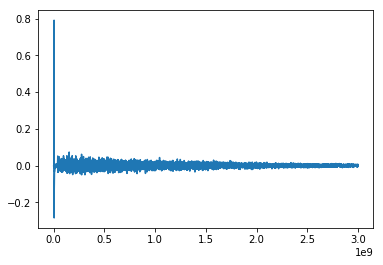

In [17]:
plt.plot(data_simulation_polybox['polybox1'])

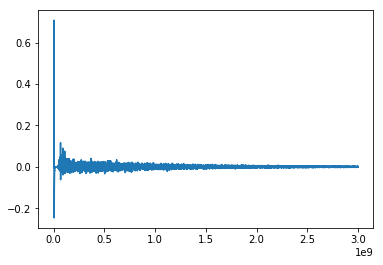

In [18]:
plt.plot(data_simulation_sliding_lid['closed'])

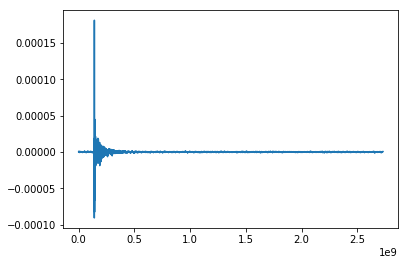

In [19]:
plt.plot(data_measurement_studio_h['indoor'])

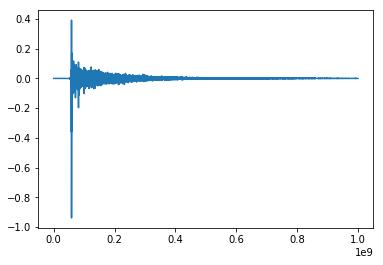

In [20]:
plt.plot(data_measurement_volume['small_volume'])